<h1> ML Assignment 2: Report </h1>

<hr> <h2> Introduction

<hr> <h3> Task </h3> <p> The task that was chosen by us involved the use of scheduler which will pop an item from any of the three provided queues. From these queues the mean delay would be calculated for each queue which refers to the average delay for all packets in the queue which would be measured in timeslots. The scheduler can choose one packet to pop from a selected queue per timeslot. Priority queue 1 and 2 have a mean delay requirement of 6 and 4 seconds respectively, meaning the mean delay for each queue cannot exceed that amount. Every timeslot a certain amount of each packet will enter the queue. The goal of the scheduler is to maintain the mean delay for queue 1 and 2 to be under the mean delay requirement, whilst minimizing the mean delay for the best effort queue.

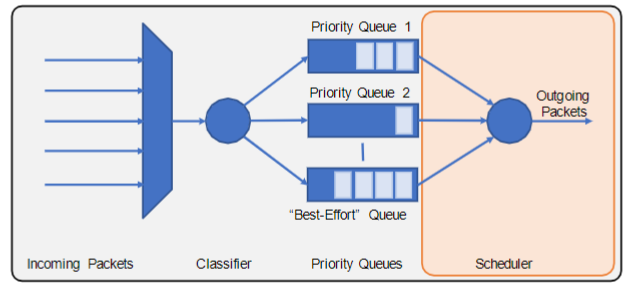


<h3> Approach </h3>


<p> In open AI gym, an environment will be set up allowing for visualization of the waiting time for each queue using Reinforced Learning. The objective of this will be to allow an agent to find an optimal policy over time through trial and error, iteratively mapping states to actions and maximizing the cumulative reward over time. Within this environment, we have established three actions: popping packets from queue 1, 2, or 3. We have also defined the observation space to be a discrete space including 1000000000 different possibilities in order to simplify the process for the q-learning algorithm. </p>
<p> Furthermore, with the environment set up, a baseline q-learning model will be the selected algorithm to learn from the environment. This has been selected due to the model-free nature of q-learning meaning it does not require a pre-existing dataset, which is useful as this task does not provide one.</p>
<p> After the baseline model is set up, further advancements to the model will be made by adjusting the hyperparameters of the q-learning model and the best hyper parameters will be selected as the final model for this task </p>

<h2> Implementation </h2> <hr>

<h3> Imports </h3>

In [1]:
from gym import spaces, Env
import numpy as np
import random
from math import floor

<h3> Functions </h3>

In [19]:
def discretize_continuous_state(waiting_times):
    for waiting_time in waiting_times:
#         limit average waiting time to 100 seconds
        if waiting_time > 99.9:
            waiting_time = 99
    return 10000000* abs(round(waiting_times[0])) + 10000*abs(round(waiting_times[1])) + 10*abs(round(waiting_times[2]))

def calc_reward(waiting_times, current_best_effort_mean_delay):
    if waiting_times[0] < -6:
        return -10
    elif waiting_times[1] < -4:
        return -10
    else:
        if waiting_times[2] > current_best_effort_mean_delay:
            return 1
        else:
            return -1
        
def append_packets(packet_info, queues, time):
    for i in range(len(packet_info)):
            for sublist in packet_info:
                if sublist[0] == i:
                    whole_packets = floor((time*sublist[1] - sublist[3]))
                    if whole_packets > 0:
                        queues[i].append(1)
                        print("Appending to queue", i)
                        sublist[3] += 1
                        
def calc_reward(curr_mean_delay_best_effort, current_waiting_time, queues, action):
#   heavily penalize for choosing empty queue
    if (len(queues[action]) == 0):
        return -25
#   reward for clearing list
    elif not any(queues):
        return 25
#   penalize for not popping queue 1 when it has a mean delay over 4
    elif current_waiting_time[0][1] < -4 and action != 0:
        return -10
#   penalize for not popping queue 2 when it has a mean delay over 6
    elif current_waiting_time[1][1] < -6 and action != 1:
        return -10
    else:
        if curr_mean_delay_best_effort == 0:
            curr_mean_delay_best_effort = current_waiting_time
            return 1
#       reward if model improves mean_delay in best effort
        elif curr_mean_delay_best_effort < current_waiting_time:
            curr_mean_delay_best_effort = current_waiting_time
            return 1
#       penalize slightly if model mean_delay in best effort queue increases
        elif curr_mean_delay_best_effort > current_waiting_time:
            curr_mean_delay_best_effort = current_waiting_time
            reward = -1
        else:
            reward = 1

def add_time(queue):
    for i in range(len(queue)):
        queue[i] -= 1

def calc_mean_delay(queue):
    current_queue = self.queues[i]
    # Calculate the length and average waiting time of the current queue
    current_length = len(current_queue)
    current_waiting_time = np.average(current_queue) if current_length > 0 else 0.0
    #print(np.average(current_queue), current_length, current_waiting_time )
    current_waiting_time = np.round(current_waiting_time, 1)
    
    

In [1]:
queues = [[],[],[]]
packet_info = [[0,0.3,6,0], [1,0.6,4,0], [2,0.4,float('inf'),0]]

time = 1
for x in range(10):
    print("time: ", time)
    append_packets(packet_info, queues, time)
    print(queues)
    time += 1


time:  1


NameError: name 'append_packets' is not defined